# 凸包

In [18]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('./hand.png')
gray = cv2.imread('./hand.png',0)

# 二值化
thersh,binary = cv2.threshold(gray,150,255,cv2.THRESH_BINARY)

contours , hierarchy = cv2.findContours(binary,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(img,contours,0,(0,0,255),2)

# 多边形逼近
approx = cv2.approxPolyDP(contours[0],20,True)   # 阈值：20 ； 轮廓闭合：true

# 画出多边形逼近的轮廓
cv2.drawContours(img,[approx],0,(0,0,255),2)

# 计算凸包
hull = cv2.convexHull(contours[0])
# 画出凸包
cv2.drawContours(img,[hull],0,(0,255,0),2)

cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 外接矩形

In [19]:
# 最小外接矩形
import cv2
import numpy as np

img = cv2.imread('./Hello.png')
gray = cv2.imread('./Hello.png',0)

# 二值化
thersh,binary = cv2.threshold(gray,150,255,cv2.THRESH_BINARY)
# 查找轮廓
contours , hierarchy = cv2.findContours(binary,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

# rect 是一个 Rotated Rect 旋转的矩形，矩形的起始坐标 (x,y) ，矩形的长宽，矩形的旋转角度
rect = cv2.minAreaRect(contours[1])
# print(rect)
# boxPoints 帮助计算 旋转矩阵的 4个坐标点
box = cv2.boxPoints(rect)
print(box)
# box = np.int0(box)
# print(box)  # np.int0 方法直接丢掉小数，不是四舍五入
# 四舍五入
box = np.round(box).astype('int64')     # 先四舍五入，在修改数据类型
cv2.drawContours(img,[box],0,(0,0,255),2)   # 报错：坐标为浮点数，所以需要转换为整形

# 最大外接矩形 ，返回最大外接矩形的参数，(x,y),(w,h)
x,y,w,h = cv2.boundingRect(contours[1])
cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[ 51.01114 146.7587 ]
 [ 81.01865  52.67057]
 [616.5541  223.4689 ]
 [586.54663 317.55704]]


# 图像金字塔-高斯金字塔

In [24]:
import cv2
import numpy as np

img = cv2.imread('./lena.png')

# 向下采样
print(img.shape)
# 分辨率减小的操作
dst = cv2.pyrDown(img)
print(dst.shape)

# 向上采样
dst1 = cv2.pyrUp(dst)

cv2.imshow('img',img)
cv2.imshow('dstDown',dst)
cv2.imshow('dstUp',dst1)
cv2.waitKey(0)
cv2.destroyAllWindows()

(512, 512, 3)
(256, 256, 3)


# 拉普拉斯金字塔

In [26]:
import cv2
import numpy as np

img = cv2.imread('./lena.png')

# 先缩小
dst = cv2.pyrDown(img)

# 再放大
dst  = cv2.pyrUp(dst)

lap0 = img - dst

cv2.imshow('img',img)
cv2.imshow('lap0',lap0)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 使用OpenCV 统计直方图

In [1]:
import cv2
import numpy as np

img = cv2.imread('./lena.png')

hist = cv2.calcHist([img],[0],None,[256],[0,255])
print(hist)
print(hist.size)

[[0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [7.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [1.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [3.000e+00]
 [2.000e+00]
 [7.000e+00]
 [1.400e+01]
 [2.400e+01]
 [4.600e+01]
 [6.700e+01]
 [1.080e+02]
 [1.370e+02]
 [2.540e+02]
 [3.470e+02]
 [4.830e+02]
 [6.260e+02]
 [7.850e+02]
 [1.135e+03]
 [1.262e+03]
 [1.631e+03]
 [1.756e+03]
 [2.201e+03]
 [2.355e+03]
 [2.514e+03]
 [2.767e+03]
 [2.943e+03]
 [2.958e+03]
 [2.921e+03]
 [2.876e+03]
 [2.907e+03]
 [2.869e+03]
 [2.873e+03]
 [2.899e+03]
 [3.043e+03]
 [2.919e+03]
 [3.041e+03]
 [3.107e+03]
 [3.238e+03]
 [3.224e+03]

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 4.500e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 3.880e+02, 0.000e+00, 0.000e+00, 1.171e+03, 0.000e+00,
        0.000e+00, 0.000e+00, 2.211e+03, 0.000e+00, 0.000e+00, 3.583e+03,
        0.000e+00, 0.000e+00, 5.472e+03, 0.000e+00, 0.000e+00, 6.460e+03,
        0.000e+00, 5.922e+03, 0.000e+00, 0.000e+00, 5.104e+03, 0.000e+00,
        4.325e+03, 0.000e+00, 3.100e+03, 0.000e+00, 2.479e+03, 0.000e+00,
        2.093e+03, 0.000e+00, 1.730e+03, 0.000e+00, 1.566e+03, 0.000e+00,
        1.469e+03, 0.000e+00, 1.377e+0

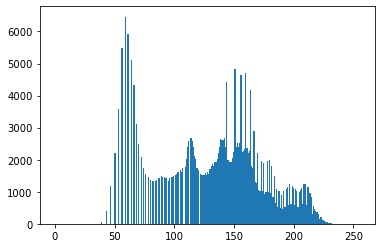

In [5]:
# 绘制直方图
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 不用OpenCV 的统计方法
img = cv2.imread('./lena.png')

gray = cv2.imread('./lena.png',0)

# 统计直方数据
"""
    ravel() 方法，将图像变成一维
"""
plt.hist(gray.ravel(),bins=256,range=[0,255])

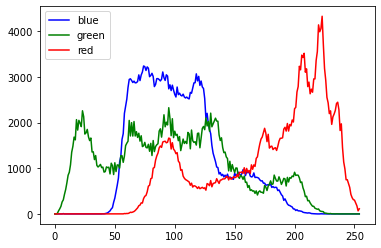

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./lena.png')

# 统计直方数据
histb = cv2.calcHist([img],[0],None,[255],[0,256])
histg = cv2.calcHist([img],[1],None,[255],[0,256])
histr = cv2.calcHist([img],[2],None,[255],[0,256])

plt.plot(histb,color='b',label='blue')
plt.plot(histg,color='g',label='green')
plt.plot(histr,color='r',label='red')

plt.legend()
plt.show()

# 使用掩膜直方图

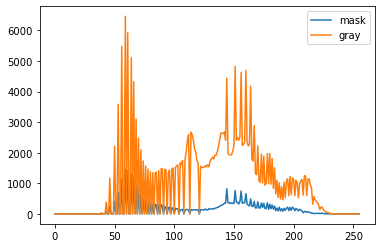

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./lena.png')
gray = cv2.imread('./lena.png',0)

# 生成掩膜图像
mask = np.zeros(gray.shape,np.uint8)

# 设置想要统计直方图的区域
mask[200:400,200:400] = 255

hist_mask = cv2.calcHist([gray],[0],mask,[256],[0,255])
hist_gray = cv2.calcHist([gray],[0],None,[256],[0,255])

plt.plot(hist_mask,label='mask')
plt.plot(hist_gray,label='gray')
plt.legend()

cv2.imshow('lena',img)
cv2.imshow('mask',mask)
# gray 与 gray 做与运输，结果还是gray，mask的作用，就是 gray 和 gray 先做与运算，结果再和mask做与运算
cv2.imshow('mask_gray',cv2.bitwise_and(gray,gray,mask=mask))

cv2.waitKey(0)
cv2.destroyAllWindows()